<a href="https://colab.research.google.com/github/ParkEunbin/ML_basic/blob/main/210201_Lenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lenet-5

- 32x32 의 input
- convolution layer는 6개의 특징맵을 만듬> 6개의 필터(5x5) 사용
- maxpooling
- convolution layer는 16개의 특징맵을 만듬> 16개의 필터(5x5) 사용
- maxpooling
- flatten
- 120개의 노드, 84개의 노드를 가진 hidden layer 
- 10개의 output

- 'padding'= same : convolution layer에서 입력이미지와 동일한 사이즈로 출력을 냄

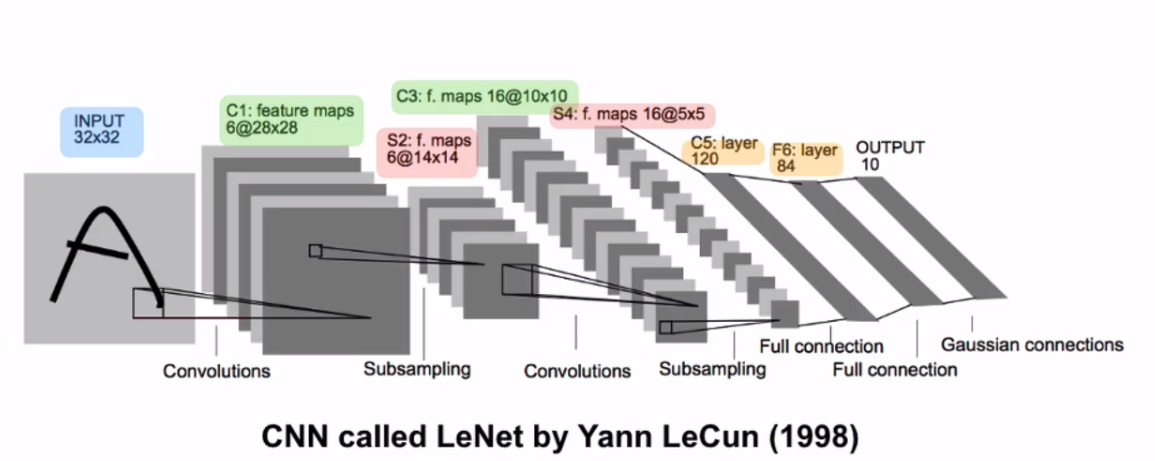


In [1]:
import tensorflow as tf
import pandas as pd

In [3]:
#1. 데이터를 준비
(독립,종속),_=tf.keras.datasets.mnist.load_data()
독립= 독립.reshape(60000,28,28,1)
종속=pd.get_dummies(종속)
print(독립.shape,종속.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1) (60000, 10)


In [5]:
# 모델 만들기

X= tf.keras.layers.Input(shape=[28,28,1])

H= tf.keras.layers.Conv2D(6,kernel_size=5,padding='same',activation='swish')(X)
H= tf.keras.layers.MaxPool2D()(H)

H= tf.keras.layers.Conv2D(16,kernel_size=5,activation='swish')(H)
H=tf.keras.layers.MaxPool2D()(H)

H=tf.keras.layers.Flatten()(H)
H=tf.keras.layers.Dense(120,activation='swish')(H)
H=tf.keras.layers.Dense(84,activation='swish')(H)
Y=tf.keras.layers.Dense(10,activation='softmax')(H)

model= tf.keras.models.Model(X,Y)
model.compile(loss='categorical_crossentropy',metrics='accuracy')


In [6]:
model.fit(독립,종속,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 50s 26ms/step - loss: 1.0977 - accuracy: 0.8635
Epoch 2/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0872 - accuracy: 0.9762
Epoch 3/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0653 - accuracy: 0.9823
Epoch 4/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0577 - accuracy: 0.9852
Epoch 5/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0559 - accuracy: 0.9869
Epoch 6/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0619 - accuracy: 0.9857
Epoch 7/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0557 - accuracy: 0.9876
Epoch 8/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0663 - accuracy: 0.9860
Epoch 9/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0614 - accuracy: 0.9871
Epoch 10/10
1875/1875 [==============================] - 45s 24m

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120 

## cifar 10

In [9]:
  #1. 데이터를 준비
(독립,종속),_=tf.keras.datasets.cifar10.load_data()

print(독립.shape,종속.shape)

# 종속=pd.get_dummies(종속) > 에러가 남 ; 표의 형태이기 때문에 / 1차원 형태여야 get_dummies가 가능
종속=pd.get_dummies(종속.reshape(50000))
print(독립.shape,종속.shape)


(50000, 32, 32, 3) (50000, 1)
(50000, 32, 32, 3) (50000, 10)


In [14]:
# 모델 만들기

X= tf.keras.layers.Input(shape=[32,32,3])

H= tf.keras.layers.Conv2D(6,kernel_size=5,activation='swish')(X)
H= tf.keras.layers.MaxPool2D()(H)

H= tf.keras.layers.Conv2D(16,kernel_size=5,activation='swish')(H)
H=tf.keras.layers.MaxPool2D()(H)

H=tf.keras.layers.Flatten()(H)
H=tf.keras.layers.Dense(120,activation='swish')(H)
H=tf.keras.layers.Dense(84,activation='swish')(H)
Y=tf.keras.layers.Dense(10,activation='softmax')(H)

model= tf.keras.models.Model(X,Y)
model.compile(loss='categorical_crossentropy',metrics='accuracy')

In [15]:
model.fit(독립,종속,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 45s 28ms/step - loss: 3.0446 - accuracy: 0.2670
Epoch 2/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.5699 - accuracy: 0.4333
Epoch 3/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.4590 - accuracy: 0.4859
Epoch 4/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.3984 - accuracy: 0.5080
Epoch 5/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.3787 - accuracy: 0.5188
Epoch 6/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.3598 - accuracy: 0.5310
Epoch 7/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.3515 - accuracy: 0.5320
Epoch 8/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.3398 - accuracy: 0.5393
Epoch 9/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.3350 - accuracy: 0.5427
Epoch 10/10
1563/1563 [==============================] - 44s 28m

In [16]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 120)               4812